In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib
from io import StringIO
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy.stats import ttest_ind, levene
import pingouin as pg 
matplotlib.rcParams['pdf.fonttype'] = 42
strain = 0.30

In [18]:
def data_org(file_path):

    buffer = StringIO()
    current_time = None
    
    with open(file_path, "r") as f:
        for line in f:
            if line.strip() == "ITEM: TIMESTEP":
                current_time = f.readline().strip()
                continue
                
            parts = line.strip().split()
            if len(parts) == 5:
                buffer.write(f"{current_time} {' '.join(parts)}\n")
    
    buffer.seek(0)
    df = pd.read_csv(buffer, sep=' ', 
                     names=["time", "id", "type", "x", "y", "z"])
    return df

In [19]:
def contact_index(lamins_df, chromatin_df, time):

    last_chromatin_df = chromatin_df[chromatin_df["time"] == time].reset_index(drop = True)

    last_lamins_df = lamins_df[lamins_df["time"] == time].reset_index(drop = True)

    chr_map = np.zeros((last_chromatin_df.shape[0],1))

    for ind, chr in last_chromatin_df.iterrows():

        distance = (last_lamins_df["x"] - chr["x"])**2 + (last_lamins_df["y"] - chr["y"])**2 + (last_lamins_df["z"] - chr["z"])**2
        
        distance = distance**0.5

        chr_map[ind,0] = np.min(distance)

    last_chromatin_df["contact index"] = chr_map
    
    return last_chromatin_df

In [20]:
def dam_ID(before_pullings_tet, after_pullings_tet, condition, output_path, color_after, color_after_err, before_pullings_tet_lad, after_pullings_tet_lad, segment_s, segment_b, fig_size):

    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 3))  

    sns.lineplot(data=before_pullings_tet_lad, y="mean_index", x=before_pullings_tet_lad.index, marker='', color='#0B3D91')
    ax.fill_between(before_pullings_tet_lad.index,  before_pullings_tet_lad['mean_index'] - before_pullings_tet_lad['sem'], before_pullings_tet_lad['mean_index'] + before_pullings_tet_lad['sem'], color='#1B4F72', alpha=0.2)
    ax.set_title(f'{condition}, Before Pulling', fontsize=16)
    ax.set_xlabel("Index", fontsize=14)
    ax.set_ylabel("Contact Index", fontsize=14)
    ax.set_xticks(np.arange(0, 48016, 6000))
    ax.tick_params(labelsize=12)
    ax.margins(x=0)
    ax.axhline(y=1, color='black', linestyle='--')
    ax.set_ylim(0, 1.2)


    plt.tight_layout()
    plt.show()


    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 3))  

    sns.lineplot(data=after_pullings_tet_lad, y="mean_index", x=after_pullings_tet_lad.index, marker='', color=color_after)
    ax.fill_between(after_pullings_tet_lad.index, after_pullings_tet_lad['mean_index'] - after_pullings_tet_lad['sem'], after_pullings_tet_lad['mean_index'] + after_pullings_tet_lad['sem'], color=color_after, alpha=0.2)
    ax.set_title(f'{condition}, After Pulling', fontsize=16)
    ax.set_xlabel("Index", fontsize=14)
    ax.set_ylabel("Contact Index", fontsize=14)
    ax.set_xticks(np.arange(0, 48016, 6000))
    ax.tick_params(labelsize=12)
    ax.margins(x=0)
    ax.axhline(y=1, color='black', linestyle='--')
    ax.set_ylim(0, 1.2)


    plt.tight_layout()
    plt.show()


    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=fig_size)  

    sns.lineplot(data=before_pullings_tet_lad[segment_s:segment_b], y="mean_index", x=before_pullings_tet_lad[segment_s:segment_b].index, marker='', color='#0B3D91')
    ax.fill_between(before_pullings_tet_lad[segment_s:segment_b].index, before_pullings_tet_lad[segment_s:segment_b]['mean_index'] - before_pullings_tet_lad[segment_s:segment_b]['sem'], 
                    before_pullings_tet_lad[segment_s:segment_b]['mean_index'] + before_pullings_tet_lad[segment_s:segment_b]['sem'] ,color='#1B4F72', alpha=0.2)
    ax.set_title(f'{condition}, Before Pulling', fontsize=16)
    ax.set_xlabel("Index", fontsize=14)
    ax.set_ylabel("Contact Index", fontsize=14)
    ax.tick_params(labelsize=12)
    ax.margins(x=0)
    ax.axhline(y=1, color='black', linestyle='--')
    ax.set_ylim(0, 1.2)


    plt.savefig(f"{output_path}/before_pullings_tet_zoom_{condition}_{segment_s}_{segment_b}.pdf", format='pdf', bbox_inches='tight')
    

    plt.tight_layout()
    plt.show()

    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=fig_size)  

    sns.lineplot(data=after_pullings_tet_lad[segment_s:segment_b], y="mean_index", x=after_pullings_tet_lad[segment_s:segment_b].index, marker='', color=color_after)
    ax.fill_between(after_pullings_tet_lad[segment_s:segment_b].index, after_pullings_tet_lad[segment_s:segment_b]['mean_index'] - after_pullings_tet_lad[segment_s:segment_b]['sem'], 
                    after_pullings_tet_lad[segment_s:segment_b]['mean_index'] + after_pullings_tet_lad[segment_s:segment_b]['sem'], color=color_after, alpha=0.2)
    ax.set_title(f'{condition}, After Pulling', fontsize=16)
    ax.set_xlabel("Index", fontsize=14)
    ax.set_ylabel("Contact Index", fontsize=14)
    ax.tick_params(labelsize=12)
    ax.margins(x=0)
    ax.axhline(y=1, color='black', linestyle='--')
    ax.set_ylim(0, 1.2)


    plt.savefig(f"{output_path}/after_pullings_tet_zoom_{condition}_{segment_s}_{segment_b}.pdf", format='pdf', bbox_inches='tight')


    plt.tight_layout()
    plt.show()


In [21]:
def calculate_contact_proportion(after_pullings_tet, after_path, after):

    after_pullings_tet = pd.read_csv(after_path)

    after_pullings_tet.iloc[:, :] = after_pullings_tet.iloc[:, :].applymap(lambda x: 1 if x <= 2.5 else 0)

    FTNC_contact_prop = []

    if after:
        for col in after_pullings_tet.columns[::]:
            FTNC_contact_prop.append((after_pullings_tet[col].value_counts().get(1, 0) / len(after_pullings_tet[col])*100))

    else:
        for col in after_pullings_tet.columns[:]:
            FTNC_contact_prop.append((after_pullings_tet[col].value_counts().get(1, 0) / len(after_pullings_tet[col])*100))
    
    FTNC_contact_prop = pd.DataFrame(FTNC_contact_prop, columns=['FTNC Contact Proportion (%)'])

    return FTNC_contact_prop

In [22]:
def preprocess_data(output_path, before_path, after_path):
    
    before_pullings_tet = pd.read_csv(before_path)
    after_pullings_tet = pd.read_csv(after_path)

    before_pullings_tet['mean'] = before_pullings_tet.mean(axis=1)
    after_pullings_tet['mean'] = after_pullings_tet.mean(axis=1)

    before_pullings_tet['mean_index'] = before_pullings_tet['mean'].map(lambda x: 1 if x <= 2.5 else 0)
    after_pullings_tet['mean_index'] = after_pullings_tet['mean'].map(lambda x: 1 if x <= 2.5 else 0)

    before_pullings_tet.iloc[:,:-2] = before_pullings_tet.iloc[:,:-2].map(lambda x: 1 if x <= 2.5 else 0)
    after_pullings_tet.iloc[:,:-2] = after_pullings_tet.iloc[:,:-2].map(lambda x: 1 if x <= 2.5 else 0)

    before_pullings_tet['sem'] = before_pullings_tet.iloc[:,:-2].sem(axis=1)
    after_pullings_tet['sem'] = after_pullings_tet.iloc[:,:-2].sem(axis=1)

    return before_pullings_tet, after_pullings_tet

In [23]:
def plot_bars(data, output_path, title, color):

    intervals = [(0.70, 0.80), (0.80, 0.90), (0.90, 1.00), (1.00, 1.10), (1.10, 1.20), (1.20, 1.30), (1.30, 1.40), (1.40, 1.50), (1.50, 1.60),
    (1.70, 1.80), (1.80, 1.90), (1.90, 2.00), (2.00, 2.10), (2.10, 2.20), (2.20, 2.30), (2.30, 2.40), (2.40, 2.50)]

    interval_labels = [f"{start}-{end}" for (start, end) in intervals]
    categories = interval_labels + ['No Contacts (>2.5)']
    for_ticks = [f"{end}" for (start, end) in intervals] + ['No Contacts (>2.5)']
    count_matrix = {category: [] for category in categories}

    for rep in data.columns:
            
        rep_data = data[rep]

        interval_counts = []
        for start, end in intervals:
            count = ((rep_data > start) & (rep_data <= end)).sum()
            interval_counts.append(count)
        
        no_contacts = (rep_data > 2.5).sum()
        
        for i, label in enumerate(interval_labels):
            count_matrix[label].append(interval_counts[i])
        count_matrix['No Contacts (>2.5)'].append(no_contacts)

    means = [np.mean(count_matrix[cat]) for cat in categories]
    errors = [np.std(count_matrix[cat])/10 for cat in categories]

    fig, (ax1, ax2) = plt.subplots(ncols=1, nrows=2, sharex=True, gridspec_kw={'hspace': 0.1})

    ax1.bar(categories, means, yerr=errors, capsize=10, color=color, edgecolor='black', linewidth=1, capstyle='round', error_kw=dict(ecolor='black', lw=1, capsize=5, capthick=1))
    ax2.bar(categories, means, yerr=errors, capsize=10, color=color, edgecolor='black', linewidth=1, capstyle='round', error_kw=dict(ecolor='black', lw=1, capsize=5, capthick=1))

    ax1.set_ylim(10000, 45000)
    ax2.set_ylim(0, 4000)
    ax1.get_xaxis().set_visible(False)

    ax1.set_ylabel("Frequency")
    ax2.set_xlabel("Radial Distance (sigma)")   
    ax2.set_xticklabels(for_ticks, rotation=45, ha='right')
    ax2.grid(True)
    ax1.grid(True)
    ax1.spines['bottom'].set_visible(False)
    ax2.spines['top'].set_visible(False)
    fig.text(-0.00, 0.55, "Frequency", va="center", rotation="vertical")
    fig.subplots_adjust(left=0.12, right=0.85, bottom=0.10, top=0.85)
    plt.savefig(f"{output_path}/{title}.pdf", format='pdf', bbox_inches='tight')
    plt.show()

/var/folders/8k/t2v98c256ngb4cr7j7p5m8100000gn/T/ipykernel_36569/756664863.py:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  after_pullings_tet.iloc[:, :] = after_pullings_tet.iloc[:, :].applymap(lambda x: 1 if x <= 2.5 else 0)


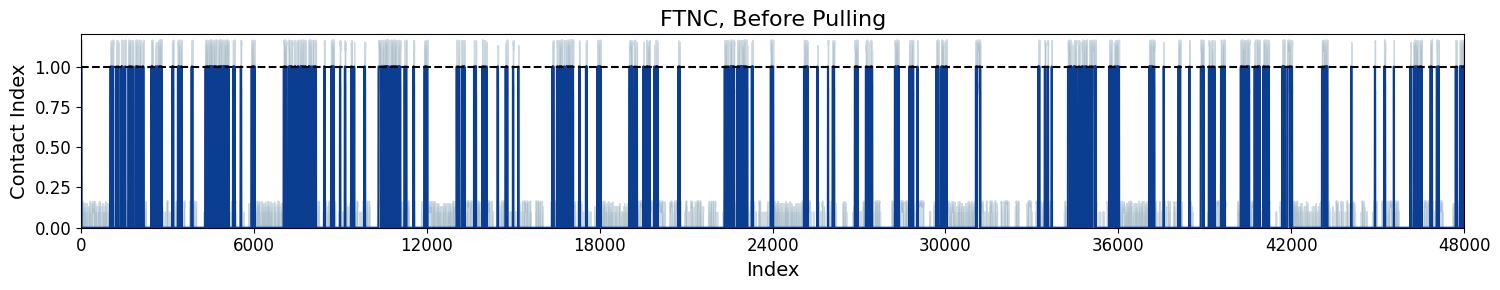

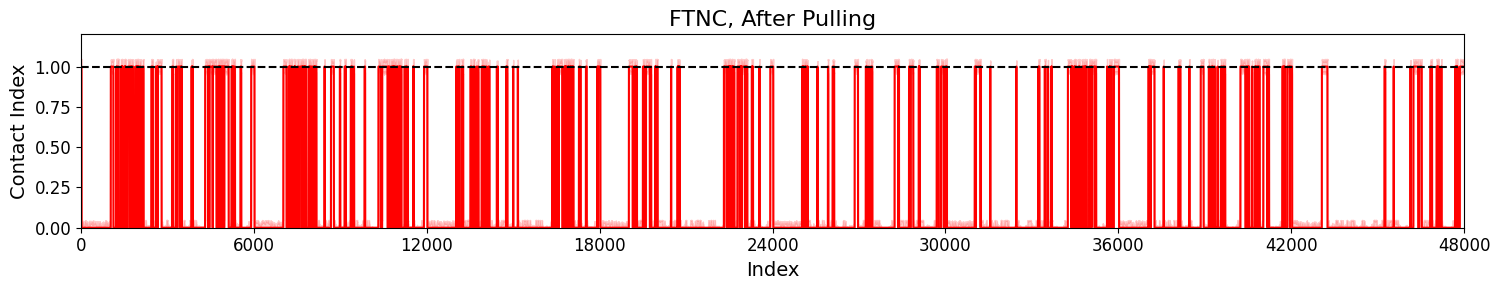

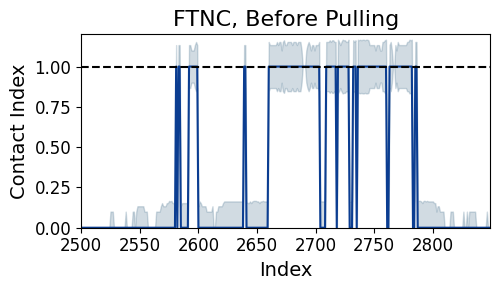

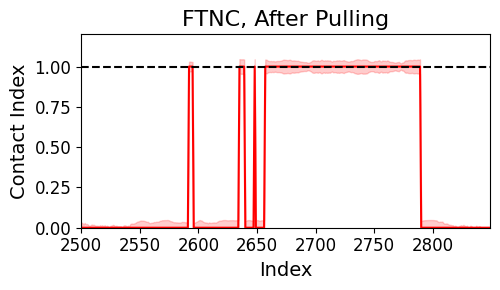

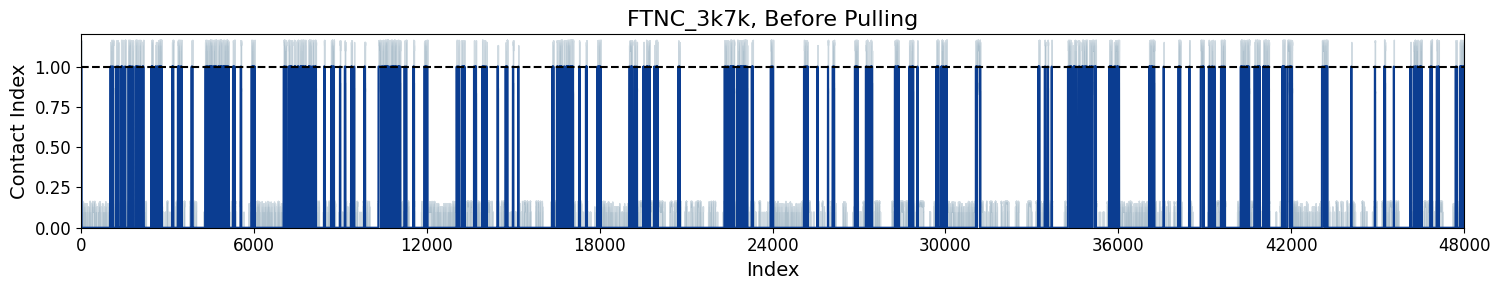

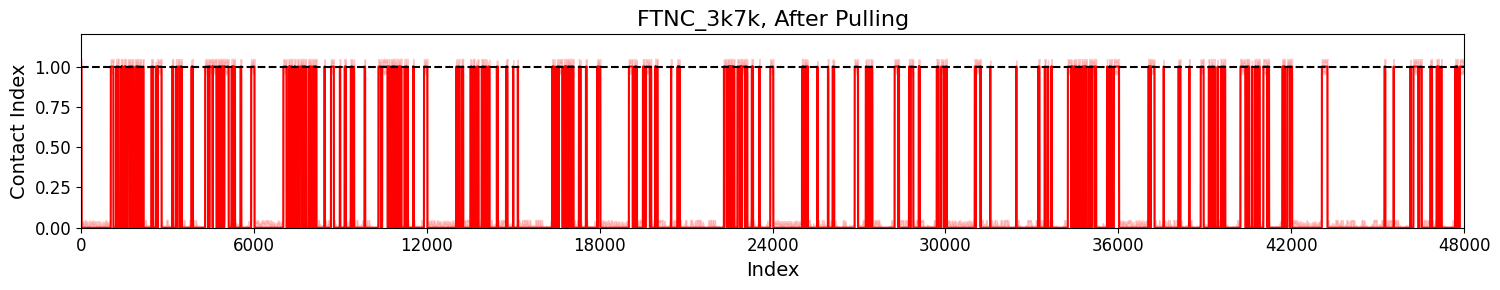

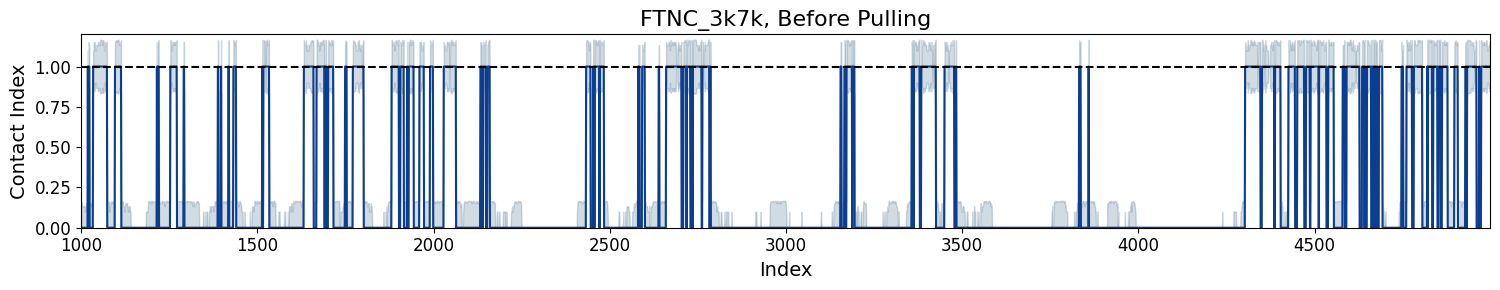

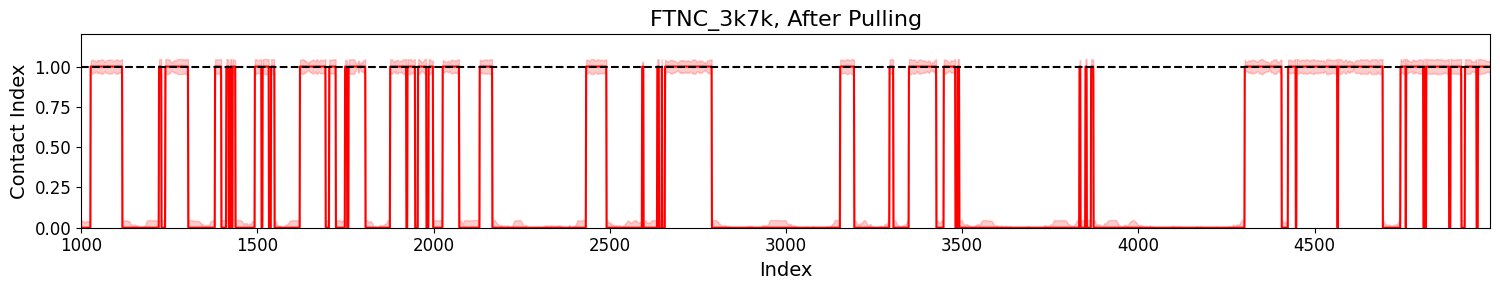

/var/folders/8k/t2v98c256ngb4cr7j7p5m8100000gn/T/ipykernel_36569/4076568797.py:40: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(for_ticks, rotation=45, ha='right')


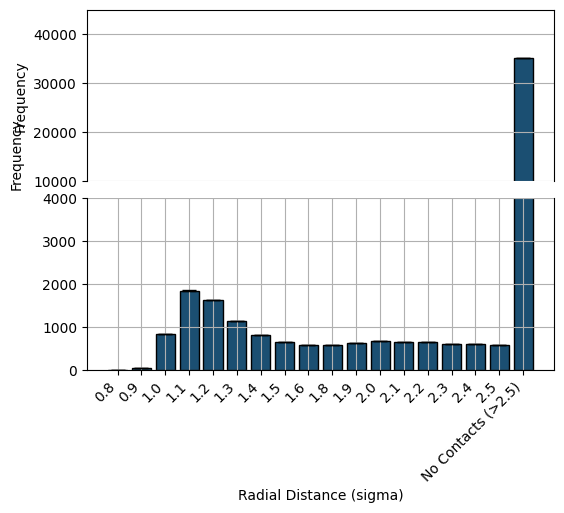

/var/folders/8k/t2v98c256ngb4cr7j7p5m8100000gn/T/ipykernel_36569/4076568797.py:40: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(for_ticks, rotation=45, ha='right')


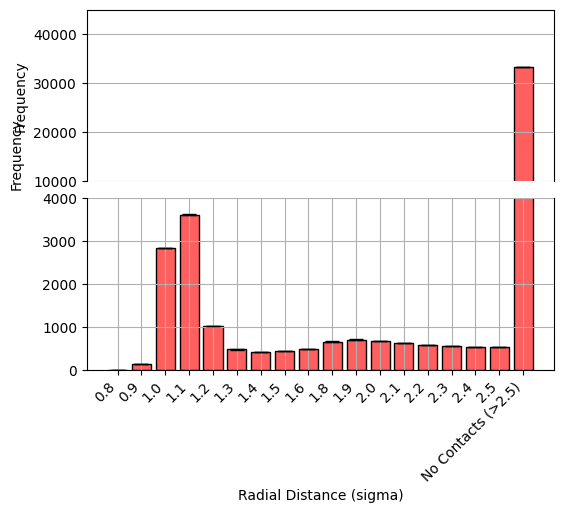

In [24]:
output_path = '/Users/attar/Desktop/PS/New Folder With Items/Results/Results_New'
before_path = f"{output_path}/before_contacts_FacTether-NoCross.csv"
after_path = f"{output_path}/after_contacts_FacTether-NoCross.csv"

before_pullings_tet, after_pullings_tet = preprocess_data(output_path, before_path, after_path)

FTNC_contact_prop = calculate_contact_proportion(after_pullings_tet, after_path, True)

dam_ID(before_pullings_tet, after_pullings_tet, 'FTNC', output_path, '#FF0000', '#FF5F5F', before_pullings_tet, after_pullings_tet, 2500, 2850, (5,3))

dam_ID(before_pullings_tet, after_pullings_tet, 'FTNC_3k7k', output_path, '#FF0000', '#FF5F5F', before_pullings_tet, after_pullings_tet, 1000, 5000, (15, 3))

before_pullings_tet = pd.read_csv(before_path)
after_pullings_tet = pd.read_csv(after_path)

plot_bars(before_pullings_tet, output_path, 'FTNC_Before_Pulling', '#1B4F72')

plot_bars(after_pullings_tet, output_path, 'FTNC_After_Pulling', '#FF5F5F')

/var/folders/8k/t2v98c256ngb4cr7j7p5m8100000gn/T/ipykernel_36569/756664863.py:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  after_pullings_tet.iloc[:, :] = after_pullings_tet.iloc[:, :].applymap(lambda x: 1 if x <= 2.5 else 0)
/var/folders/8k/t2v98c256ngb4cr7j7p5m8100000gn/T/ipykernel_36569/756664863.py:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  after_pullings_tet.iloc[:, :] = after_pullings_tet.iloc[:, :].applymap(lambda x: 1 if x <= 2.5 else 0)


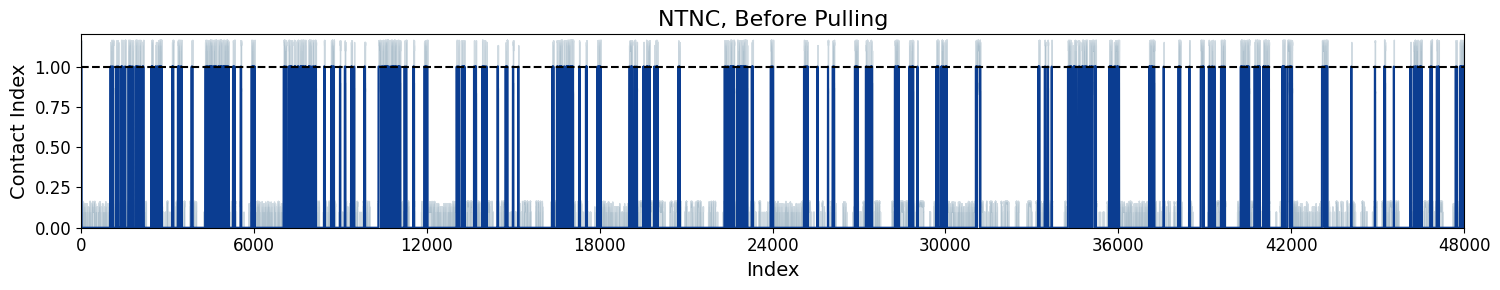

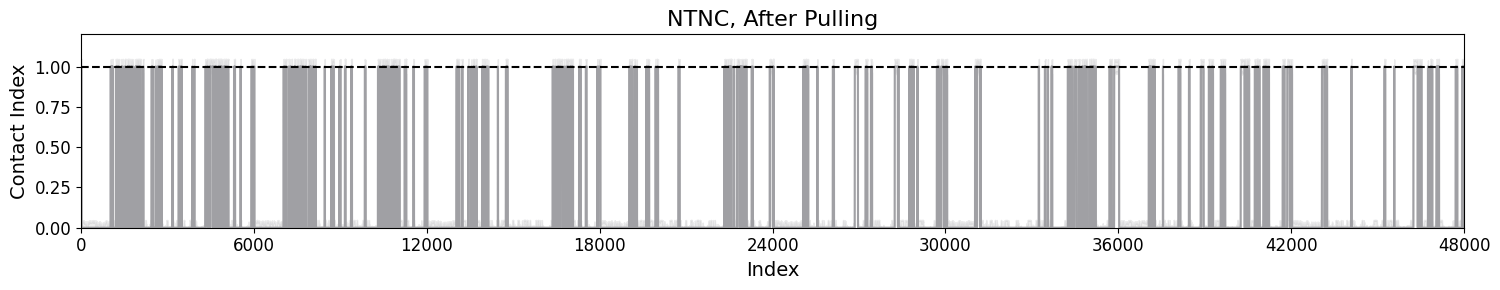

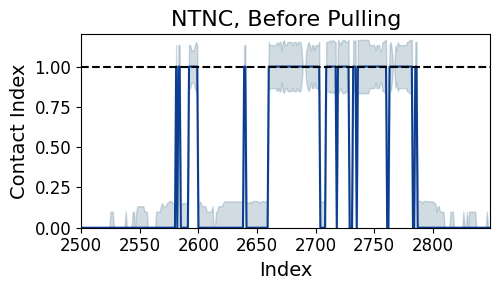

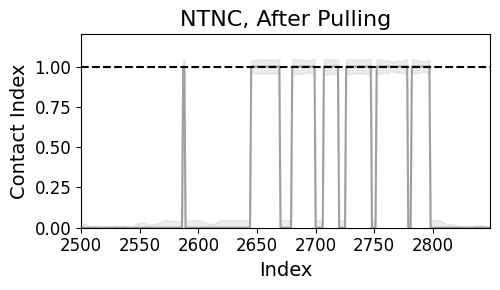

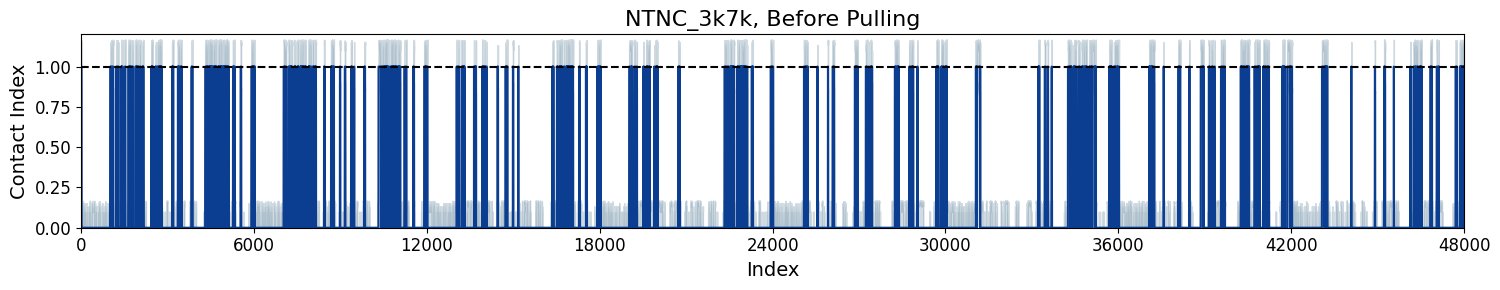

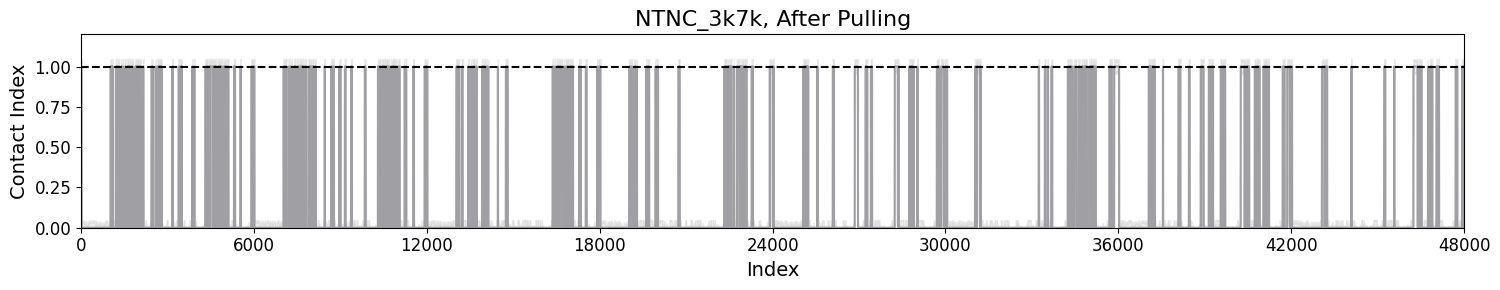

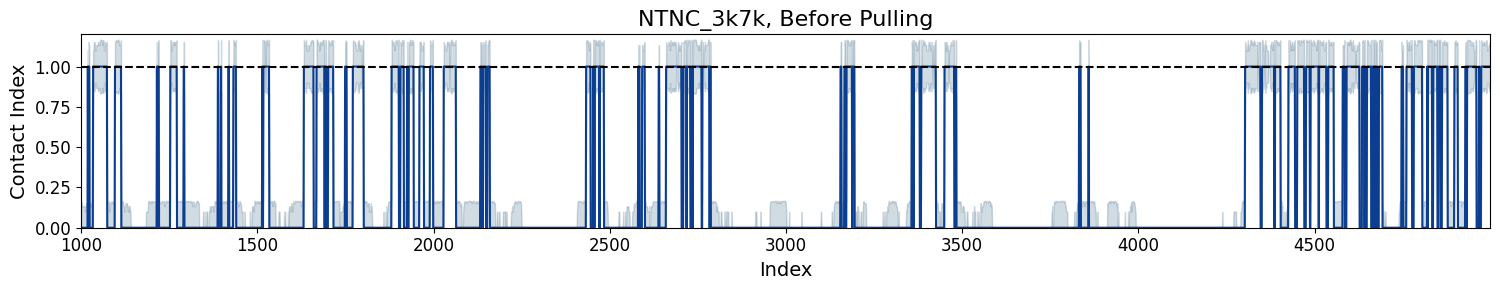

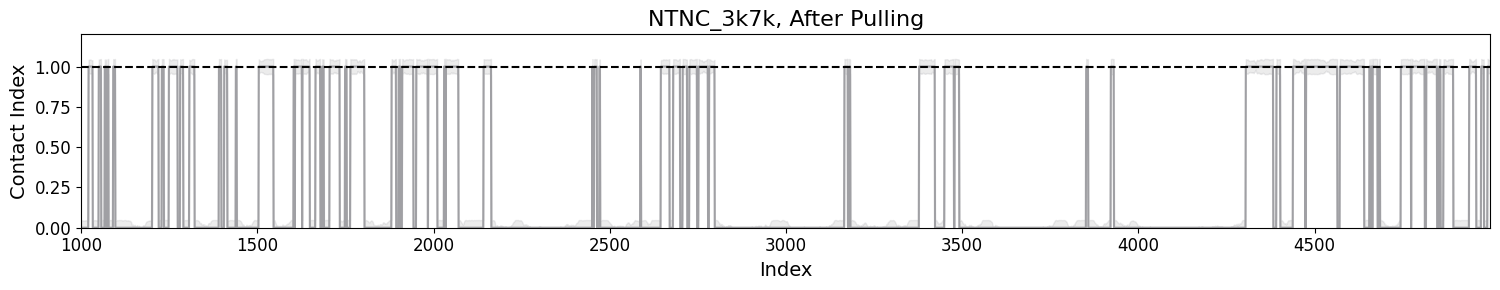

/var/folders/8k/t2v98c256ngb4cr7j7p5m8100000gn/T/ipykernel_36569/4076568797.py:40: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(for_ticks, rotation=45, ha='right')


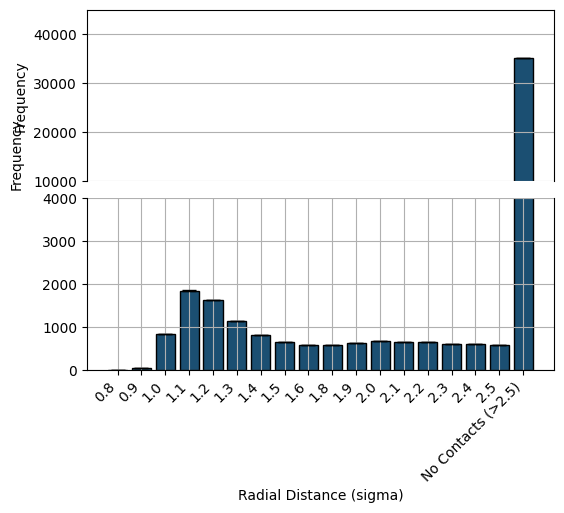

/var/folders/8k/t2v98c256ngb4cr7j7p5m8100000gn/T/ipykernel_36569/4076568797.py:40: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(for_ticks, rotation=45, ha='right')


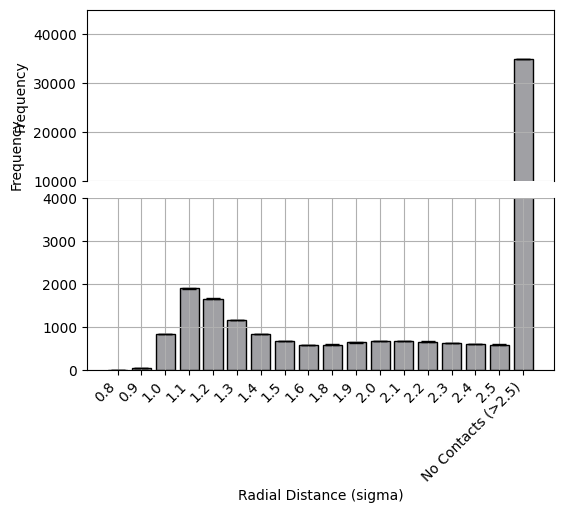

In [25]:
output_path = '/Users/attar/Desktop/PS/New Folder With Items/Results/Results_New'

before_path = f"{output_path}/before_contacts_NoTether-NoCross.csv"
after_path = f"{output_path}/after_contacts_NoTether-NoCross.csv"

before_pullings_tet, after_pullings_tet = preprocess_data(output_path, before_path, after_path)

NTNC_contact_prop = calculate_contact_proportion(after_pullings_tet, after_path, True)

NTNC_contact_before_prop = calculate_contact_proportion(before_pullings_tet, before_path, False)

dam_ID(before_pullings_tet, after_pullings_tet, 'NTNC', output_path, '#A0A0A4', '#D9D9DD', before_pullings_tet, after_pullings_tet, 2500, 2850, (5,3))

dam_ID(before_pullings_tet, after_pullings_tet, 'NTNC_3k7k', output_path,  '#A0A0A4', '#D9D9DD', before_pullings_tet, after_pullings_tet, 1000, 5000, (15, 3))


before_pullings_tet = pd.read_csv(before_path)
after_pullings_tet = pd.read_csv(after_path)

plot_bars(before_pullings_tet, output_path, 'NTNC_Before_Pulling', '#1B4F72')

plot_bars(after_pullings_tet, output_path, 'NTNC_After_Pulling', '#A0A0A4')


/var/folders/8k/t2v98c256ngb4cr7j7p5m8100000gn/T/ipykernel_36569/756664863.py:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  after_pullings_tet.iloc[:, :] = after_pullings_tet.iloc[:, :].applymap(lambda x: 1 if x <= 2.5 else 0)
/var/folders/8k/t2v98c256ngb4cr7j7p5m8100000gn/T/ipykernel_36569/756664863.py:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  after_pullings_tet.iloc[:, :] = after_pullings_tet.iloc[:, :].applymap(lambda x: 1 if x <= 2.5 else 0)


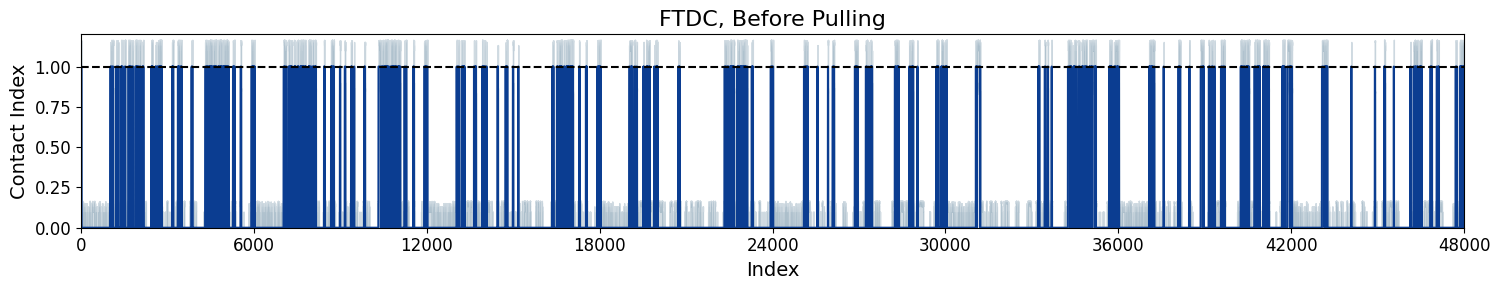

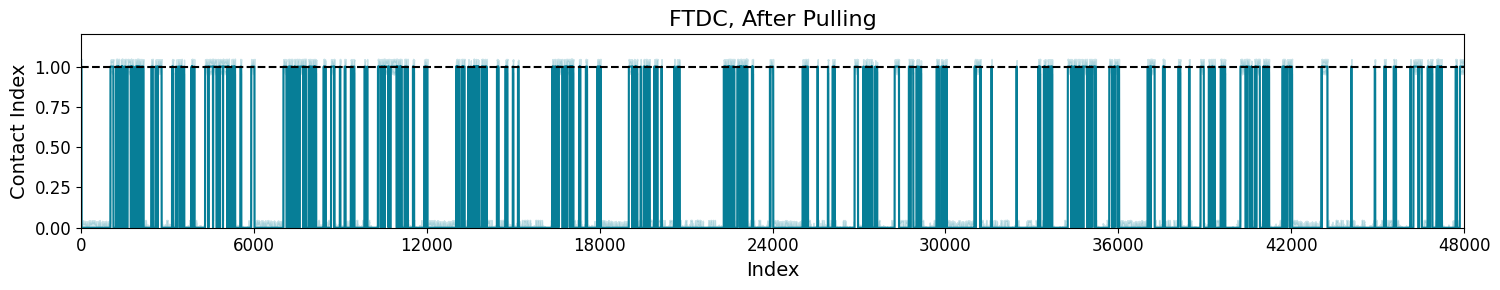

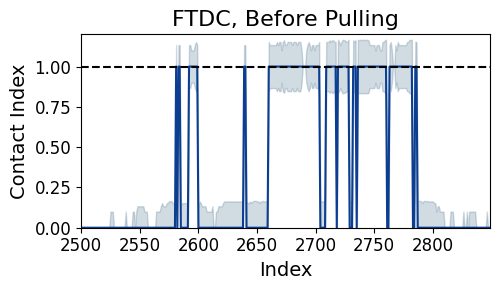

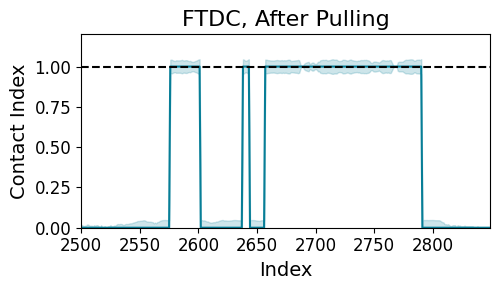

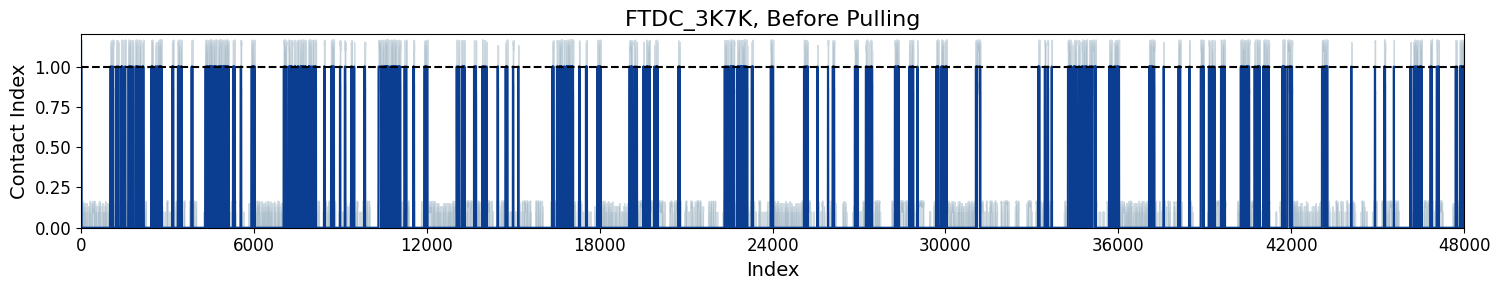

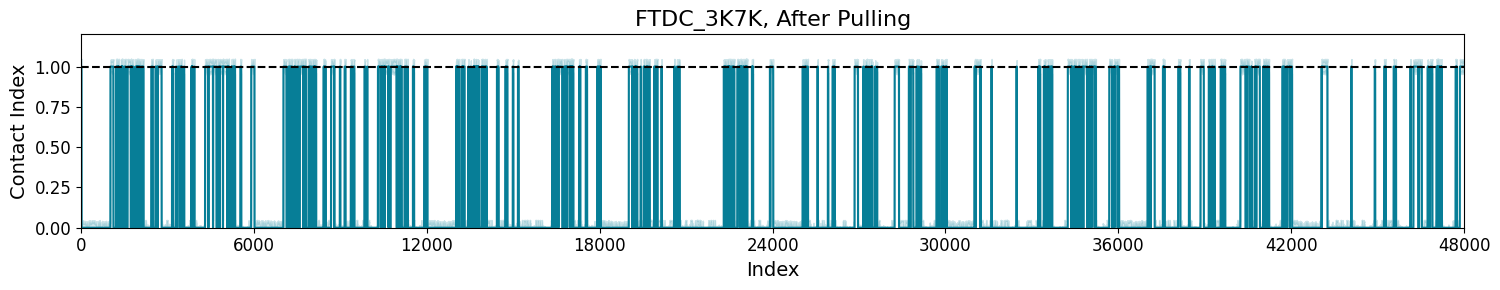

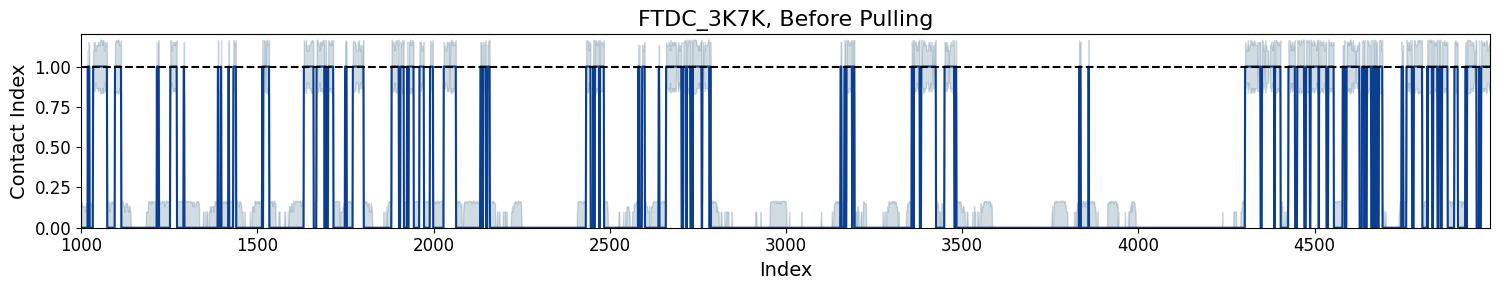

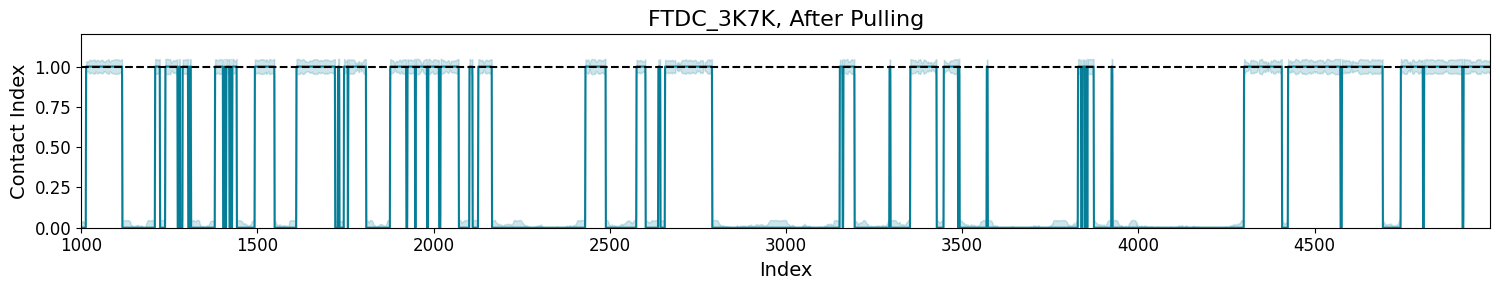

/var/folders/8k/t2v98c256ngb4cr7j7p5m8100000gn/T/ipykernel_36569/4076568797.py:40: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(for_ticks, rotation=45, ha='right')


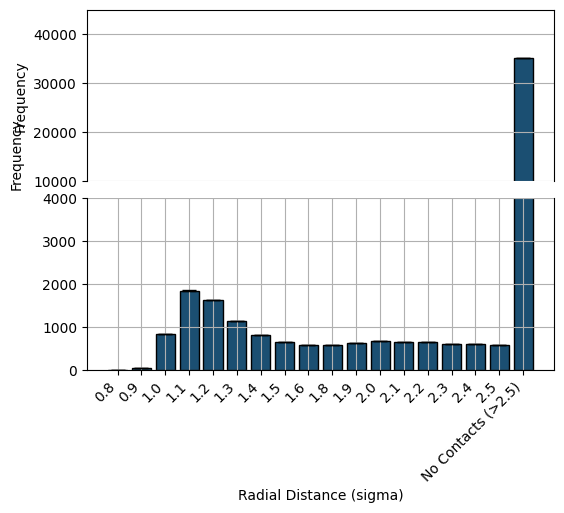

/var/folders/8k/t2v98c256ngb4cr7j7p5m8100000gn/T/ipykernel_36569/4076568797.py:40: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(for_ticks, rotation=45, ha='right')


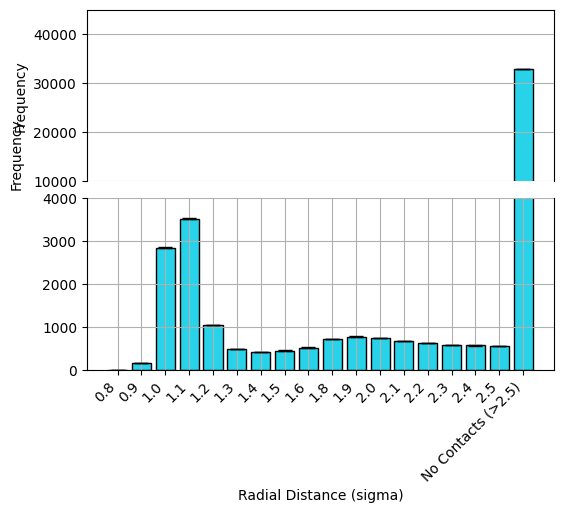

In [26]:

output_path = '/Users/attar/Desktop/PS/New Folder With Items/Results/Results_New'
before_path = f"{output_path}/before_contacts_Doublecross.csv"
after_path = f"{output_path}/after_contacts_Doublecross.csv"

before_pullings_tet, after_pullings_tet = preprocess_data(output_path, before_path, after_path)

FTDC_contact_prop = calculate_contact_proportion(after_pullings_tet, after_path, True)

FTDC_before_contact_prop = calculate_contact_proportion(before_pullings_tet, before_path, False)

dam_ID(before_pullings_tet, after_pullings_tet, 'FTDC', output_path, '#077E97', '#28D3EA', before_pullings_tet, after_pullings_tet, 2500, 2850, (5,3))

dam_ID(before_pullings_tet, after_pullings_tet, 'FTDC_3K7K', output_path, '#077E97', '#28D3EA', before_pullings_tet, after_pullings_tet, 1000, 5000, (15,3))

before_pullings_tet = pd.read_csv(before_path)
after_pullings_tet = pd.read_csv(after_path)

plot_bars(before_pullings_tet, output_path, 'DTNC_Before_Pulling', '#1B4F72')

plot_bars(after_pullings_tet, output_path, 'DTNC_After_Pulling', '#28D3EA')


In [ ]:
def plot_bar_with_sem(dataframes, file_paths, column='30', output_file='FacTetherNoCross-HetRatios.pdf'):
    
    group1 = dataframes[0][column].dropna()
    group2 = dataframes[1][column].dropna()
    group3 = dataframes[2][column].dropna()

    levene_stat, levene_p = levene(group1, group2, group3)

    if len(dataframes) == 4:
        group4 = dataframes[3][column].dropna()
        levene_stat, levene_p = levene(group1, group2, group3, group4)

    print(f'Levene Test for Homogeneity of Variance: {levene_stat:.3f}, p-value: {levene_p:.3f}')

    if levene_p > 0.05:
        print("Homogeneity of variance assumption is satisfied.")
    else:
        print("Warning: Homogeneity of variance assumption is not satisfied")

    groups = [group1, group2, group3]
    if len(dataframes) == 4:
        groups.append(group4)

    for i in range(len(groups)):
        for j in range(i + 1, len(groups)):
            stat, p_value = ttest_ind(groups[i], groups[j], equal_var=False)  # Using Welch's t-test
            print(f'Welch t-statistic (Group {i + 1} vs Group {j + 1}): {stat}, p-value: {p_value}')
            t_test_result = "significant" if p_value <= 0.05 else "no significant"
            print(f"There is {t_test_result} difference between Group {i + 1} and Group {j + 1}.")

    data = np.concatenate(groups)
    labels = []
    for i, group in enumerate(groups, 1):
        labels.extend(['Case ' + str(i)] * len(group))

    df = pd.DataFrame({'Value': data, 'Group': labels})

    anova = ols('Value ~ Group', data=df).fit()
    anova_table = sm.stats.anova_lm(anova, typ=2)
    print("\nRegular ANOVA Results:")
    print(anova_table)

    welch_anova = pg.welch_anova(data=df, dv='Value', between='Group')
    print("\nWelch's ANOVA Results:")
    print(welch_anova)

    if levene_p <= 0.05:

        games_howell = pg.pairwise_gameshowell(data=df, dv='Value', between='Group')
        print("\nGames-Howell post-hoc test results:")
        print(games_howell)
    else:

        tukey = pairwise_tukeyhsd(df['Value'], df['Group'])
        print("\nTukey's HSD test results:")
        print(tukey)

        significance = [''] * len(tukey._results_table.data[1:])
        for ind, row in enumerate(tukey.summary().data[1:]):
            group1, group2, meandiff, pval, lower, upper, reject = row
            formatted_pval = f"{pval:.3e}" if pval > 1e-15 else "< 1e-15"
            
            if pval < 0.001:
                significance[ind] = '***'
            elif pval < 0.01:
                significance[ind] = '**'
            elif pval < 0.05:
                significance[ind] = '*'

            print(f"{group1} vs {group2}: Mean Difference = {meandiff:.3f}, p-value = {formatted_pval}, "
                  f"95% CI: ({lower:.3f}, {upper:.3f}), Reject Null: {reject}, Significance: {significance[ind]}")

    means = [df[column].mean() for df in dataframes]
    sems = [df[column].sem() for df in dataframes]
    data_points = [df[column].dropna() for df in dataframes]

    plt.figure(figsize=(6, 6))
    x_positions = np.arange(len(means))

    plt.bar(
        x_positions,
        means,
        yerr=sems,
        capsize=10,
        alpha=1,
        color=['skyblue', 'lightgreen', 'salmon', 'lightcoral'][:len(means)],
        width=0.6
    )

    markers = ['o', 's', '^', 'D']
    for i, points in enumerate(data_points):
        plt.scatter(
            [x_positions[i]] * len(points) + np.random.uniform(-0.25, 0.25, len(points)),
            points,
            color='black',
            alpha=1,
            s=50,
            marker=markers[i],
            label=None if i > 0 else 'Data Points'
        )

    plt.ylim(25, 34)
    plt.xlabel("DataFrames")
    plt.ylabel(f"Values ({column} Column)")
    plt.title(f"Bar Plot with SEM for '{column}' Column")
    plt.tight_layout()
    plt.savefig(output_file)
    plt.show()


In [37]:
mean_NTNC_ARR = []
mean_FTNC_ARR = []
mean_FTDC_ARR = []

for rep in range(10):

    start = rep * 10
    mean_NTNC = NTNC_contact_prop[rep:start+10].mean().values
    mean_FTNC = FTNC_contact_prop[rep:start+10].mean().values
    mean_FTDC = FTDC_contact_prop[rep:start+10].mean().values

    mean_NTNC_ARR.append(mean_NTNC)
    mean_FTNC_ARR.append(mean_FTNC)
    mean_FTDC_ARR.append(mean_FTDC)

    
mean_NTNC_ARR = pd.DataFrame(mean_NTNC_ARR, columns=['FTNC Contact Proportion (%)'])
mean_FTNC_ARR = pd.DataFrame(mean_FTNC_ARR, columns=['FTNC Contact Proportion (%)'])
mean_FTDC_ARR = pd.DataFrame(mean_FTDC_ARR, columns=['FTNC Contact Proportion (%)'])

Levene Test for Homogeneity of Variance: 2.414, p-value: 0.083
Homogeneity of variance assumption is satisfied.
Welch t-statistic (Group 1 vs Group 2): -9.02152122672647, p-value: 4.730351064688835e-06
There is significant difference between Group 1 and Group 2.
Welch t-statistic (Group 1 vs Group 3): -46.311841878634354, p-value: 2.763268455561053e-16
There is significant difference between Group 1 and Group 3.
Welch t-statistic (Group 1 vs Group 4): -59.67993964923638, p-value: 2.0095245510081666e-16
There is significant difference between Group 1 and Group 4.
Welch t-statistic (Group 2 vs Group 3): -76.85019541806015, p-value: 2.4317581754321998e-17
There is significant difference between Group 2 and Group 3.
Welch t-statistic (Group 2 vs Group 4): -116.88205217399324, p-value: 4.5056733057553144e-21
There is significant difference between Group 2 and Group 4.
Welch t-statistic (Group 3 vs Group 4): -18.96978154273264, p-value: 4.653937398022582e-13
There is significant difference b

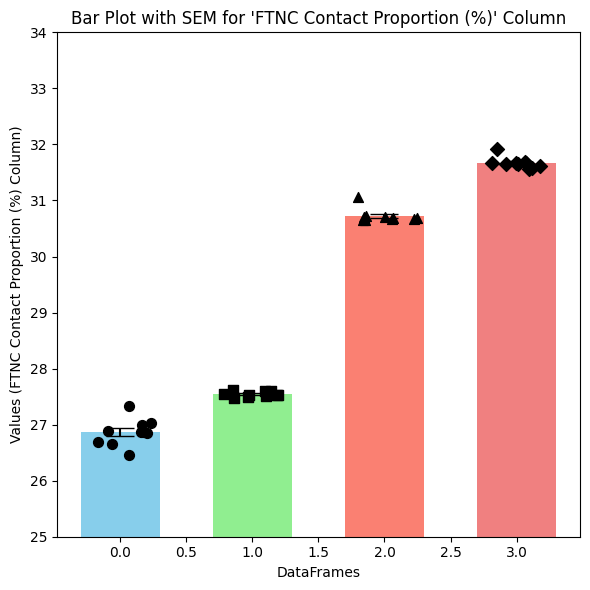

In [39]:
dataframes = [NTNC_contact_before_prop, mean_NTNC_ARR, mean_FTNC_ARR, mean_FTDC_ARR]

plot_bar_with_sem(dataframes, ['NTNCbefore', 'NTNCafter', 'FTNC', 'FTDC'], column='FTNC Contact Proportion (%)', output_file='Contacts_Figure4.pdf')